
<p><img alt="" height="384" name="alpha.svg" src="https://ucarecdn.com/6f109109-c5d3-4ac3-b17a-36c924758bb9/" width="1056" /></p>

An array <code>price</code> contains daily prices of a stock share for a period of $N$ consecutive days.
Every day an investor can buy or short-sell any amount of shares, 
called <em>position</em> and denoted by $\alpha$ (a real number).
When $\alpha \gt 0$ the investor buys $\alpha$ shares and sells them the next day.
When $\alpha \lt 0$ the investor lends $|\alpha|$ shares, immediately sells them 
and the next day he buys $|\alpha|$ shares and returns them to the lender.
The profit of this operation is $\alpha_{i} \cdot r_i$,
where $i$ is the day index and $r_i = \frac{p_{i+1} - p_i}{p_i}$ is the <em>daily return</em>.
</p>

<p>
A <em>trading strategy</em> is a function <code>alpha</code> which returns the position $\alpha_i$ for the day $i$
given the information from the previous days. 
In our case <code>alpha</code> has just one argument, namely the array <code>price</code>
which contains the values $p_k$ for $k\le i$.
</p>

<p>
The performance of a trading strategy can be measured by several metrics.
We will use the classical <em>Sharpe ratio</em> which is given in our case by
$$
S = \frac{\sum_{i} \alpha_i r_i}{\sqrt{\sum_{i} r_i^2}} \cdot \sqrt{252}.
$$
</p>

<p>
Your task is to analyze the sample data and to develop a trading strategy such that $S \ge 2.5$.
</p>


In [1]:
%load_ext stepikutils.submitter
%load_dataset datasets/alpha.npz
%whos 

Variable   Type       Data/Info
-------------------------------
price      ndarray    2002: 2002 elems, type `float64`, 16016 bytes


In [2]:
%%solution_code 3220805

import numpy as np

def alpha(price):
    N = len(price)
    if N < 2:
        return 0
    if price[-1] > price[-2]:
        return 1
    elif price[-1] < price[-2]:
        return -0.5
    else:
        return 0


Button(description='Submit code', style=ButtonStyle())

In [3]:

from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']


In [4]:

def simulate(alpha, price, start=0, end=None):
    if end is None:
        end = len(price)-1

    returns = diff(price)/price[:-1]
        
    position = zeros_like(returns)
    profit = zeros_like(returns)
    cost = zeros_like(returns)
    for di in range(start, end):
        position[di] = alpha(price[:di+1])
        profit[di] = position[di]*returns[di]
        cost[di] = position[di]*price[di]
    
    return position[start:], profit[start:], cost[start:]


def sharpe_ratio(profit, annual=True):
    s = mean(profit)/std(profit)
    if annual:
        s *= sqrt(252)
    return s

def backtest(alpha, price, start=1000):
    position, profit, cost = simulate(alpha, price, start)
    A = np.max(cost)
    S = sharpe_ratio(profit)
    cumprofit = cumsum(profit) / A * 100
    t = arange(start, len(price)-1)
    plot(t, cumprofit, label = f'{alpha.__name__}, S = {S:.3g}')
    legend()
    xlabel('Day')
    ylabel('Cumulative returns (%)')


In [5]:

def alpha1(price):
    return 1


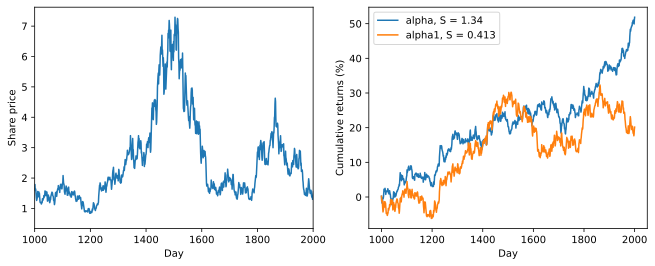

In [6]:

f = figure(figsize=[11,4])
subplot(121)
plot(price, label='price')
xlabel('Day')
ylabel('Share price')
xlim(1000, 2000)
subplot(122)
backtest(alpha, price)
backtest(alpha1, price)
savefig('alpha.svg', format='svg')
